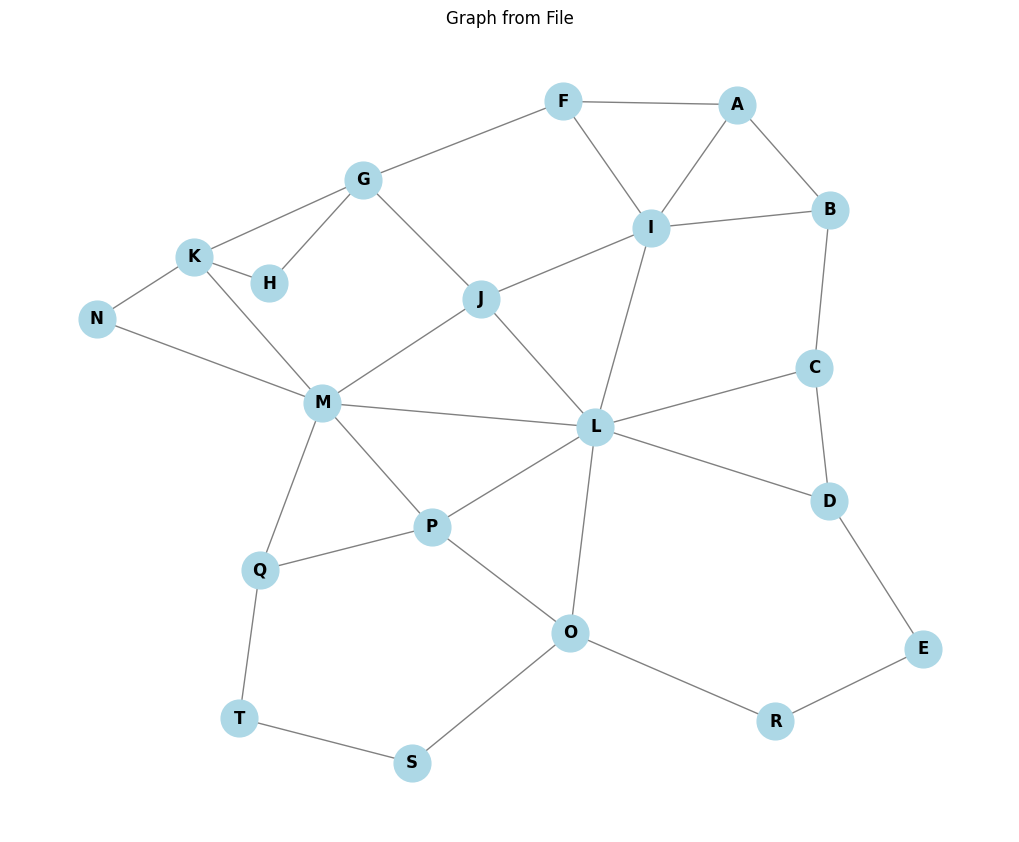

In [1]:
# Visualiza o grafo.txt
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(edges):
    G = nx.Graph()

    # Add edges to the graph
    G.add_edges_from(edges)

    # Use spring layout for better spacing
    pos = nx.spring_layout(G, k=0.5, iterations=50)  # Adjust 'k' for spacing, increase for more distance

    # Draw the graph with the specified layout
    plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700, edge_color='gray')
    plt.title("Graph from File")
    plt.show()

file = open("graph.txt", "r")
num_nodes = int(file.readline().strip())
edges = set()

for linha in file:
    a, b = linha.split()
    
    # Convert to int if they are numbers, otherwise keep as strings
    a = int(a) if a.isdigit() else a
    b = int(b) if b.isdigit() else b
    
    edges.add((a, b))

# Close the file
file.close()

# Visualize the graph
visualize_graph(edges)

In [4]:
import numpy as np
from functions import *
np.set_printoptions(threshold=np.inf)

# Utiliza ordem alfabetica para descoberta dos nós
def DFS(inicial, final, matriz_adj):
    descobertos = []
    # Pilha de vertices a serem explorados
    pilha = []
    
    # Descobre o vertice inicial e o adiciona na pilha para ser explorado
    descobertos.append(inicial-1)
    pilha.append(inicial-1)

    if inicial > len(matriz_adj) or final > len(matriz_adj):
        print("Vertice inicial ou final não existe no grafo")
        return []
    while True:
        # Obtem o primeiro item da pilha
        v = pilha.pop()
        # Obtém os vizinhos do vertice v
        vizinhos = [i for i in obter_vizinhos(v, matriz_adj) if i not in descobertos]
        for vizinho in vizinhos:
            # Descobre cada vizinho
            descobertos.append(vizinho)
            # Encerra o while se o vertice atual for igual ao destino
            if vizinho == final-1:
                return descobertos
        # Adiciona a lista de vizinhos em ordem inversa na pilha
        pilha += vizinhos[::-1]

matriz_adj = gerar_matriz_adjacente("graph.txt")
inicial, final = letter_to_int("G"), letter_to_int("S") # Retorna o número correspondente a ordem alfabética

descobertos = DFS(inicial, final, matriz_adj)

imprimir_resultado(descobertos, usarLetras=True)

Descobertos:  ['G', 'F', 'H', 'J', 'K', 'A', 'I', 'B', 'C', 'D', 'L', 'E', 'R', 'O', 'P', 'S']
